In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)

In [2]:
import numpy as np

np.random.seed(42)

X, y = np.array(mnist["data"]), np.array(mnist["target"]).astype(np.uint8)

In [3]:
X_tr, X_v, X_te, y_tr, y_v, y_te = X[:50000], X[50000:60000], X[60000:], y[:50000], y[50000:60000], y[60000:]

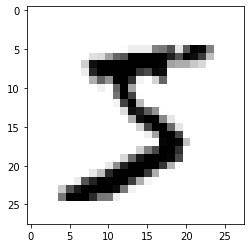

In [42]:
import matplotlib.pyplot as plt

plt.imshow(X_tr[0].reshape(28,28), cmap='binary')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_tr_prep = scaler.fit_transform(X_tr.astype(np.float64))
X_v_prep = scaler.transform(X_v.astype(np.float64))
X_te_prep = scaler.transform(X_te.astype(np.float64))

In [5]:
import pandas

pandas.DataFrame(X_tr_prep)  # 50000 instances, each one containing a 28x28 image

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032428,-0.02294,-0.016899,-0.012524,-0.009867,-0.006321,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032428,-0.02294,-0.016899,-0.012524,-0.009867,-0.006321,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032428,-0.02294,-0.016899,-0.012524,-0.009867,-0.006321,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032428,-0.02294,-0.016899,-0.012524,-0.009867,-0.006321,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032428,-0.02294,-0.016899,-0.012524,-0.009867,-0.006321,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032428,-0.02294,-0.016899,-0.012524,-0.009867,-0.006321,0.0,0.0,0.0,0.0
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032428,-0.02294,-0.016899,-0.012524,-0.009867,-0.006321,0.0,0.0,0.0,0.0
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032428,-0.02294,-0.016899,-0.012524,-0.009867,-0.006321,0.0,0.0,0.0,0.0
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032428,-0.02294,-0.016899,-0.012524,-0.009867,-0.006321,0.0,0.0,0.0,0.0


# Making the primary models

In [44]:
# MODELS: logistic regression, linear SVM, decisionTree, randomForest and extraForest

from sklearn.linear_model import SGDClassifier  # logistic regression
from sklearn.svm import SVC  # linear svc because of its efficiency
from sklearn.tree import DecisionTreeClassifier  # decision tree classifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier  # random and extra random forests

# Every chosen model uses some level of randomness, which is desirable for ensemble purposes

In [11]:
log_reg = SGDClassifier(loss='log', n_jobs=-1, early_stopping = True, random_state = 0)  # prevent overfitting
log_reg.fit(X_tr_prep, y_tr)

SGDClassifier(early_stopping=True, loss='log', n_jobs=-1, random_state=0)

In [237]:
print(sum(y_te == log_reg.predict(X_te_prep)) / len(y_te))  # pog
log_reg.predict_proba(X_te_prep[0].reshape(1,-1)) 

0.9113


array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        3.12641587e-291, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
        6.18016503e-167]])

In [46]:
lin_svc = SVC(kernel='linear', probability=True, random_state=1)  # different rnd states + enable predict_proba
lin_svc.fit(X_tr_prep, y_tr)  # oh my, this took ages

SVC(kernel='linear', probability=True, random_state=1)

In [238]:
print(sum(y_te == lin_svc.predict(X_te_prep)) / len(y_te))  # very poggers
lin_svc.predict_proba(X_te_prep[0].reshape(1,-1))  

0.926


array([[5.85584479e-04, 4.72475953e-05, 1.07246286e-03, 5.26657384e-02,
        2.17435461e-04, 1.91915826e-03, 2.17862379e-05, 9.39561808e-01,
        9.59616349e-04, 2.94916258e-03]])

In [34]:
tree = DecisionTreeClassifier(splitter='random', random_state = 2, max_depth = 20, max_leaf_nodes = 1500)  # tested
tree.fit(X_tr_prep, y_tr)

DecisionTreeClassifier(max_depth=20, max_leaf_nodes=1500, random_state=2,
                       splitter='random')

In [239]:
print(sum(y_te == tree.predict(X_te_prep)) / len(y_te))  # not bad
tree.predict_proba(X_te_prep[0].reshape(1,-1))

0.8763


array([[0.00000000e+00, 1.37136588e-03, 2.74273176e-03, 3.29127811e-03,
        5.48546352e-04, 0.00000000e+00, 0.00000000e+00, 9.85189248e-01,
        2.74273176e-04, 6.58255623e-03]])

In [49]:
rnd_forest = RandomForestClassifier(n_jobs=-1, random_state = 3)  # don't even need regularization
rnd_forest.fit(X_tr_prep, y_tr)

RandomForestClassifier(n_jobs=-1, random_state=3)

In [240]:
print(sum(y_te == rnd_forest.predict(X_te_prep)) / len(y_te))  # PAGGING
rnd_forest.predict_proba(X_te_prep[0].reshape(1,-1))

0.9687


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [51]:
extra_forest = ExtraTreesClassifier(n_jobs=-1, random_state = 4)
extra_forest.fit(X_tr_prep, y_tr)

ExtraTreesClassifier(n_jobs=-1, random_state=4)

In [241]:
print(sum(y_te == extra_forest.predict(X_te_prep)) / len(y_te))  # PAGGING
extra_forest.predict_proba(X_v_prep[0].reshape(1,-1))

0.9706


array([[0.  , 0.03, 0.02, 0.94, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ]])

### Best score in validation set: 97.56% accuracy
### Best score in test set          : 97.06% accuracy

# Ensembling

## Hard voting

In [91]:
models = [log_reg, lin_svc, tree, rnd_forest, extra_forest]
predictions = []

for model in models:
    predictions.append(log_reg.predict(X_v_prep))
    
predictions = np.array(predictions)
predictions.shape

(5, 10000)

In [92]:
from scipy.stats import mode

final_predictions = mode(predictions, axis=0)[0][0]  # first [0] for mode values, second [0] cause its 1D
final_predictions.shape

(10000,)

In [93]:
print(sum(final_predictions == y_v) / len(y_v))   # Actually... Worse than the best models. Let's try the one from mlxtend

0.9183


In [95]:
from mlxtend.classifier import EnsembleVoteClassifier  # doens't require refitting the models
import copy

hclf = EnsembleVoteClassifier(clfs=models, voting='hard', fit_base_estimators=False)
hclf.fit(X_tr_prep, y_tr)

[SGDClassifier(early_stopping=True, loss='log', n_jobs=-1, random_state=0), SVC(kernel='linear', probability=True, random_state=1), DecisionTreeClassifier(max_depth=20, max_leaf_nodes=1500, random_state=2,
                       splitter='random'), RandomForestClassifier(n_jobs=-1, random_state=3), ExtraTreesClassifier(n_jobs=-1, random_state=4)]


In [96]:
np.mean(y_v == hclf.predict(X_v_prep))  # better than my implementation, but still worse than the best model

0.9684

In [242]:
# on the test set...

np.mean(y_te == hclf.predict(X_te_prep))

0.9633

### Best score in validation set: 96.84% accuracy
### Best score in test set          : 96.33% accuracy

## Weighed hard voting

In [97]:
# Let's try to make the best performing models more relevant

log_reg_w = np.mean(y_v == log_reg.predict(X_v_prep))
lin_svc_w = np.mean(y_v == lin_svc.predict(X_v_prep))
tree_w = np.mean(y_v == tree.predict(X_v_prep))
rnd_forest_w = np.mean(y_v == rnd_forest.predict(X_v_prep))
extra_forest_w = np.mean(y_v == extra_forest.predict(X_v_prep))

In [101]:
w = [log_reg_w, lin_svc_w, tree_w, rnd_forest_w, extra_forest_w]
w = list(w / sum(w))  # gives a percentage value
w

[0.19637320103500633,
 0.19836195282595215,
 0.18871757586125784,
 0.20792079207920797,
 0.20862647819857583]

In [103]:
hclf_w = EnsembleVoteClassifier(clfs=models, voting='hard', weights=w, fit_base_estimators=False)
hclf_w.fit(X_tr_prep, y_tr)

EnsembleVoteClassifier(clfs=[SGDClassifier(early_stopping=True, loss='log',
                                           n_jobs=-1, random_state=0),
                             SVC(kernel='linear', probability=True,
                                 random_state=1),
                             DecisionTreeClassifier(max_depth=20,
                                                    max_leaf_nodes=1500,
                                                    random_state=2,
                                                    splitter='random'),
                             RandomForestClassifier(n_jobs=-1, random_state=3),
                             ExtraTreesClassifier(n_jobs=-1, random_state=4)],
                       fit_base_estimators=False, use_clones=False,
                       weights=[0.19637320103500633, 0.19836195282595215,
                                0.18871757586125784, 0.20792079207920797,
                                0.20862647819857583])

In [104]:
np.mean(y_v == hclf_w.predict(X_v_prep)) # a step in the right direction! lets try to make the weights even bigger

0.9716

In [137]:
super_w = [log_reg_w, lin_svc_w, tree_w, rnd_forest_w, extra_forest_w]

for i in range(len(super_w)):
    super_w[i] = (super_w[i]*10)**10     # makes the weight bigger than 1 and raise them to some factor
    
super_w = list(super_w / sum(super_w))  # gives a percentage value    

super_w

[0.15672912560398813,
 0.17334497918802788,
 0.10530548873647866,
 0.2775279482739827,
 0.28709245819752266]

In [135]:
hclf_sw = EnsembleVoteClassifier(clfs=models, voting='hard', weights=super_w, fit_base_estimators=False)
hclf_sw.fit(X_tr_prep, y_tr)

EnsembleVoteClassifier(clfs=[SGDClassifier(early_stopping=True, loss='log',
                                           n_jobs=-1, random_state=0),
                             SVC(kernel='linear', probability=True,
                                 random_state=1),
                             DecisionTreeClassifier(max_depth=20,
                                                    max_leaf_nodes=1500,
                                                    random_state=2,
                                                    splitter='random'),
                             RandomForestClassifier(n_jobs=-1, random_state=3),
                             ExtraTreesClassifier(n_jobs=-1, random_state=4)],
                       fit_base_estimators=False, use_clones=False,
                       weights=[0.15672912560398813, 0.17334497918802788,
                                0.10530548873647866, 0.2775279482739827,
                                0.28709245819752266])

In [136]:
np.mean(y_v == hclf_sw.predict(X_v_prep))  # slightly better!

0.9744

In [243]:
# on the test set...

np.mean(y_te == hclf_sw.predict(X_te_prep))

0.9695

### Best score in validation set: 97.44% accuracy
### Best score in test set          : 96.95% accuracy

## Soft voting

In [139]:
sclf = EnsembleVoteClassifier(clfs=models, voting='soft', fit_base_estimators=False)
sclf.fit(X_tr_prep, y_tr)

EnsembleVoteClassifier(clfs=[SGDClassifier(early_stopping=True, loss='log',
                                           n_jobs=-1, random_state=0),
                             SVC(kernel='linear', probability=True,
                                 random_state=1),
                             DecisionTreeClassifier(max_depth=20,
                                                    max_leaf_nodes=1500,
                                                    random_state=2,
                                                    splitter='random'),
                             RandomForestClassifier(n_jobs=-1, random_state=3),
                             ExtraTreesClassifier(n_jobs=-1, random_state=4)],
                       fit_base_estimators=False, use_clones=False,
                       voting='soft')

In [140]:
np.mean(y_v == sclf.predict(X_v_prep))  # Yeah, not the greatest. 

# That might be because some models are way confident, specially when they are wrong

c:\users\vlcan\machine_learning_python\mnist\venv\lib\site-packages\sklearn\linear_model\_base.py:329: RuntimeWarning: invalid value encountered in true_divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))


0.9557

In [244]:
# on the test set...

np.mean(y_te == sclf.predict(X_te_prep))

c:\users\vlcan\machine_learning_python\mnist\venv\lib\site-packages\sklearn\linear_model\_base.py:329: RuntimeWarning: invalid value encountered in true_divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))


0.9507

### Best score in validation set: 95.57% accuracy
### Best score in test set          : 95.07% accuracy

## Weighed soft voting

In [168]:
super_s_w = [log_reg_w, lin_svc_w, tree_w, rnd_forest_w, extra_forest_w]

for i in range(len(super_s_w)):
    super_s_w[i] = (super_s_w[i]*10)**50     # makes the weight bigger than 1 and raise them to some factor
    
super_s_w = list(super_s_w / sum(super_s_w))  # gives a percentage value    

super_s_w

[0.0244948996175226,
 0.04053997219252782,
 0.0033541474551418136,
 0.4264427504301517,
 0.5051682303046561]

In [170]:
sclf_w = EnsembleVoteClassifier(clfs=models, voting='soft', weights = super_s_w, fit_base_estimators=False)
sclf_w.fit(X_tr_prep, y_tr)

EnsembleVoteClassifier(clfs=[SGDClassifier(early_stopping=True, loss='log',
                                           n_jobs=-1, random_state=0),
                             SVC(kernel='linear', probability=True,
                                 random_state=1),
                             DecisionTreeClassifier(max_depth=20,
                                                    max_leaf_nodes=1500,
                                                    random_state=2,
                                                    splitter='random'),
                             RandomForestClassifier(n_jobs=-1, random_state=3),
                             ExtraTreesClassifier(n_jobs=-1, random_state=4)],
                       fit_base_estimators=False, use_clones=False,
                       voting='soft',
                       weights=[0.0244948996175226, 0.04053997219252782,
                                0.0033541474551418136, 0.4264427504301517,
                                0.505168230

In [171]:
np.mean(y_v == sclf_w.predict(X_v_prep))  # EXACTLY the same as the best model (probably because of the weights)

c:\users\vlcan\machine_learning_python\mnist\venv\lib\site-packages\sklearn\linear_model\_base.py:329: RuntimeWarning: invalid value encountered in true_divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))


0.9756

In [245]:
# on the test set...

np.mean(y_te == sclf_w.predict(X_te_prep))

c:\users\vlcan\machine_learning_python\mnist\venv\lib\site-packages\sklearn\linear_model\_base.py:329: RuntimeWarning: invalid value encountered in true_divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))


0.97

### Best score in validation set: 97.56% accuracy
### Best score in test set          : 97.00% accuracy (almost there)

# Stacking

## Hard meta dataset

In [251]:
def metafy(dataset, clfs, mode):
    
    if mode == 'hard':
        hard_meta_dataset = []

        for model in clfs:
            hard_meta_dataset.append(model.predict(dataset))

        return np.array(hard_meta_dataset).transpose()

    elif mode == 'soft':
        soft_meta_dataset = []
        
        for model in clfs:
            soft_meta_dataset.append(model.predict_proba(dataset))
    
        return np.array(soft_meta_dataset).transpose(1, 0, 2).reshape((10000, -1))
    
    return None

In [190]:
hard_meta_dataset = metafy(X_v_prep, models, 'hard')
hard_meta_dataset.shape

(10000, 5)

In [191]:
pandas.DataFrame(hard_meta_dataset)

,0,1,2,3,4
0,3,3,3,3,3
1,8,8,8,8,8
2,6,6,6,6,6
3,9,9,9,9,9
4,6,6,6,6,6
...,...,...,...,...,...
9995,8,8,8,8,8
9996,3,3,3,3,3
9997,5,5,5,5,5
9998,6,6,6,6,6


In [221]:
# Meta learner: decisionTreeClassifier (easy to train, doesn't need scaling, and doesn't relies mostly on integers)

hard_blender = DecisionTreeClassifier(min_impurity_decrease = 0.08)  # tested
hard_blender.fit(hard_meta_dataset, y_v)

DecisionTreeClassifier(min_impurity_decrease=0.08)

In [224]:
hard_meta_test = metafy(X_te_prep, models, 'hard')

In [222]:
# testing...

print(np.mean(y_te == hard_blender.predict(hard_meta_test)))  # EXACTLY 97.06. But maybe the model could be better?

0.9706


In [233]:
# Meta learner: SGDClassifier (simple model aswell)

hard_blender_svc = SGDClassifier()
hard_blender_svc.fit(hard_meta_dataset, y_v)

SGDClassifier()

In [234]:
print(np.mean(y_te == hard_blender_svc.predict(hard_meta_test)))  # NOPE

0.379


### Best score in test set: 97.06% accuracy (exactly)

## Soft meta dataset

In [252]:
soft_val_set = metafy(X_v_prep, models, 'soft')
soft_val_set.shape

c:\users\vlcan\machine_learning_python\mnist\venv\lib\site-packages\sklearn\linear_model\_base.py:329: RuntimeWarning: invalid value encountered in true_divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))


(10000, 50)

In [265]:
np.nan_to_num(soft_val_set, copy=False)

#pandas.DataFrame(soft_val_set).info()

array([[0.00000000e+000, 4.81557283e-112, 2.98925251e-125, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 9.79680017e-252, ...,
        2.00000000e-002, 8.90000000e-001, 1.00000000e-002],
       [7.31314316e-282, 0.00000000e+000, 5.82946950e-264, ...,
        0.00000000e+000, 1.00000000e-002, 0.00000000e+000],
       ...,
       [0.00000000e+000, 8.80307788e-294, 0.00000000e+000, ...,
        1.00000000e-002, 0.00000000e+000, 5.00000000e-002],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 2.00000000e-002, 1.00000000e-002],
       [1.01963272e-234, 0.00000000e+000, 0.00000000e+000, ...,
        1.00000000e-002, 7.10000000e-001, 2.00000000e-002]])

In [264]:
# Meta learner: RandomForest (why not?)

soft_blender = RandomForestClassifier(random_state = 42) 
soft_blender.fit(soft_val_set, y_v)

RandomForestClassifier(random_state=42)

In [266]:
soft_meta_test = metafy(X_te_prep, models, 'soft')

c:\users\vlcan\machine_learning_python\mnist\venv\lib\site-packages\sklearn\linear_model\_base.py:329: RuntimeWarning: invalid value encountered in true_divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))


In [268]:
# testing...

np.nan_to_num(soft_meta_test, copy=False)

print(np.mean(y_te == soft_blender.predict(soft_meta_test)))  # FI NA LLY!!!

0.9722


### Best score in test set: 97.22% accuracy (BETTER)

In [270]:
### INCREASING SPEED (The SVC is veeery slow and isn't even among the best ones. Let's remove it)

new_models = [log_reg, tree, rnd_forest, extra_forest]

new_soft_val_set = metafy(X_v_prep, new_models, 'soft')
np.nan_to_num(new_soft_val_set, copy=False)

new_soft_blender = RandomForestClassifier(random_state = 42)
new_soft_blender.fit(new_soft_val_set, y_v)

new_soft_meta_test = metafy(X_te_prep, new_models, 'soft')
np.nan_to_num(new_soft_meta_test, copy=False)

print(np.mean(y_te == new_soft_blender.predict(new_soft_meta_test)))

c:\users\vlcan\machine_learning_python\mnist\venv\lib\site-packages\sklearn\linear_model\_base.py:329: RuntimeWarning: invalid value encountered in true_divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))
c:\users\vlcan\machine_learning_python\mnist\venv\lib\site-packages\sklearn\linear_model\_base.py:329: RuntimeWarning: invalid value encountered in true_divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))


0.9718


### That was a lot faster. It's not the best model in performance, but overall, I think it is the best one